Objective : We will be determining Anomalies in a time series Data

In [1]:
import pandas as pd

In [2]:
sample_series = pd.read_csv('BAJFINANCE.NS.csv')

### Preview of the data sets

In [3]:
sample_series.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-23,3495.0,3518.000000,3355.649902,3377.750000,3364.107422,2406205.0
1,2019-05-24,3400.0,3475.000000,3391.300049,3467.899902,3453.893555,1568523.0
2,2019-05-27,3480.0,3484.949951,3440.000000,3449.000000,3435.069824,932000.0
3,2019-05-28,3468.0,3468.149902,3386.750000,3409.800049,3396.028076,1627768.0
4,2019-05-29,3403.0,3433.000000,3384.500000,3409.250000,3395.480469,921278.0


In [4]:
print("The date range : ",sample_series.Date.min() +" to " +sample_series.Date.max())
print("The # of days  : ",sample_series.Date.nunique())

The date range :  2019-05-23 to 2020-05-22
The # of days  :  245


In [5]:
sample_series.describe()

,Open,High,Low,Close,Adj Close,Volume
count,244.000000,244.000000,244.000000,244.000000,244.000000,2.440000e+02
mean,3596.354716,3648.785653,3525.845900,3586.812507,3579.010650,3.048515e+06
std,740.255877,731.274479,760.556728,750.086719,747.058934,3.309834e+06
min,1960.000000,2003.550049,1865.250000,1895.300049,1895.300049,4.070420e+05
25%,3288.924926,3328.674926,3234.987488,3275.737426,3268.225647,1.106910e+06
50%,3700.550049,3732.500000,3624.100098,3700.599975,3688.885132,1.620970e+06
75%,4132.225098,4178.300049,4089.000000,4135.750000,4126.266113,3.141297e+06
max,4867.899902,4923.399902,4853.750000,4880.450195,4869.258301,1.631851e+07


## Anomaly in Volume

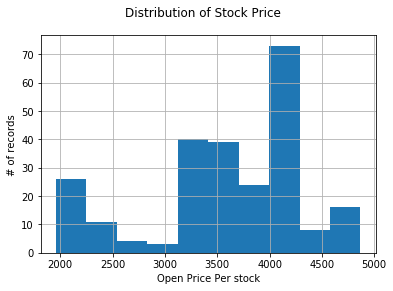

In [6]:
import matplotlib.pyplot as plt

plt.suptitle("Distribution of Stock Price")
plt.xlabel('Open Price Per stock')
plt.ylabel('# of records')

sample_series['Open'].hist()

plt.show()

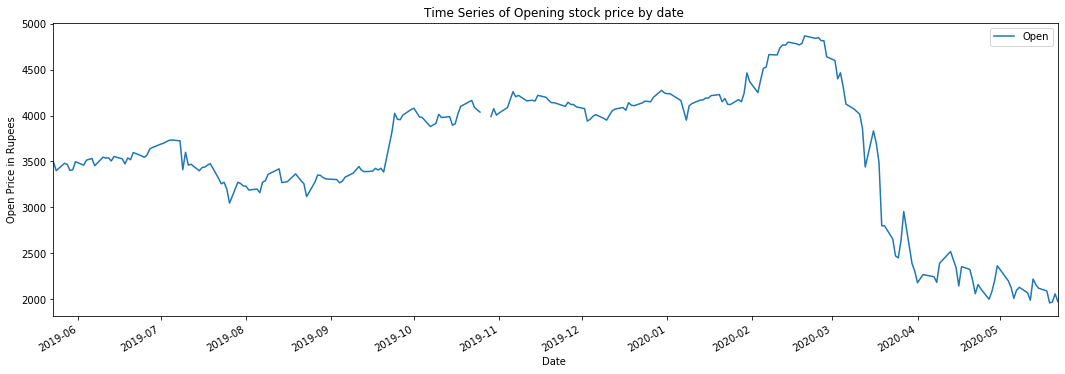

In [7]:
sample_series['Date'] = pd.to_datetime(sample_series['Date'])
sample_series.plot(x='Date', y='Open', figsize=(18,6))
plt.xlabel('Date ')
plt.ylabel('Open Price in Rupees')
plt.title('Time Series of Opening stock price by date ');

In [8]:
import datetime as dt
sample_series['weekday'] = sample_series[['Date']].apply(lambda x: dt.datetime.strftime(x['Date'], '%A'), axis=1)
sample_series.head()

,Date,Open,High,Low,Close,Adj Close,Volume,weekday
0,2019-05-23,3495.0,3518.000000,3355.649902,3377.750000,3364.107422,2406205.0,Thursday
1,2019-05-24,3400.0,3475.000000,3391.300049,3467.899902,3453.893555,1568523.0,Friday
2,2019-05-27,3480.0,3484.949951,3440.000000,3449.000000,3435.069824,932000.0,Monday
3,2019-05-28,3468.0,3468.149902,3386.750000,3409.800049,3396.028076,1627768.0,Tuesday
4,2019-05-29,3403.0,3433.000000,3384.500000,3409.250000,3395.480469,921278.0,Wednesday


In [9]:
sample_series['Date'] = pd.to_datetime(sample_series['Date'])
sample_series['28_mavg'] = sample_series['Open'].rolling(window=28).mean()
sample_series['21_mavg'] = sample_series['Open'].rolling(window=21).mean()
sample_series['14_mavg'] = sample_series['Open'].rolling(window=14).mean()
sample_series['7_mavg'] = sample_series['Open'].rolling(window=7).mean()
sample_series.head()

,Date,Open,High,Low,Close,Adj Close,Volume,weekday,28_mavg,21_mavg,14_mavg,7_mavg
0,2019-05-23,3495.0,3518.000000,3355.649902,3377.750000,3364.107422,2406205.0,Thursday,NaN,NaN,NaN,NaN
1,2019-05-24,3400.0,3475.000000,3391.300049,3467.899902,3453.893555,1568523.0,Friday,NaN,NaN,NaN,NaN
2,2019-05-27,3480.0,3484.949951,3440.000000,3449.000000,3435.069824,932000.0,Monday,NaN,NaN,NaN,NaN
3,2019-05-28,3468.0,3468.149902,3386.750000,3409.800049,3396.028076,1627768.0,Tuesday,NaN,NaN,NaN,NaN
4,2019-05-29,3403.0,3433.000000,3384.500000,3409.250000,3395.480469,921278.0,Wednesday,NaN,NaN,NaN,NaN


/Users/amit/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


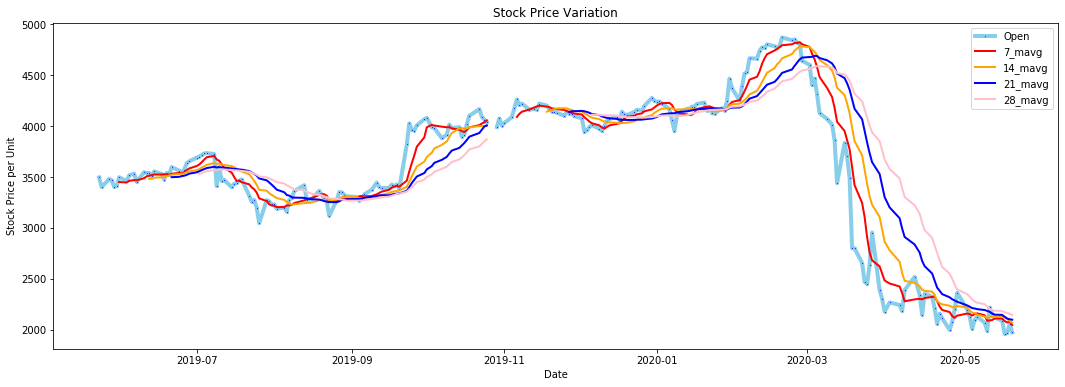

In [10]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18,6))
fig.show()
ax=fig.add_subplot(111)


ax.plot( 'Date', 'Open', data=sample_series, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=4)
ax.plot( 'Date', '7_mavg', data=sample_series, marker='', color='red', linewidth=2)
ax.plot( 'Date', '14_mavg', data=sample_series, marker='', color='orange', linewidth=2)
ax.plot( 'Date', '21_mavg', data=sample_series, marker='', color='blue', linewidth=2)
ax.plot( 'Date', '28_mavg', data=sample_series, marker='', color='pink', linewidth=2)

plt.title('Stock Price Variation')
plt.xlabel('Date')
plt.ylabel('Stock Price per Unit')
plt.legend(loc=1)
plt.draw()




### MACD : Moving Average Convergence Divergence

In [11]:
sample_series['MACD_7_14'] = sample_series['14_mavg']-sample_series['7_mavg']

/Users/amit/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


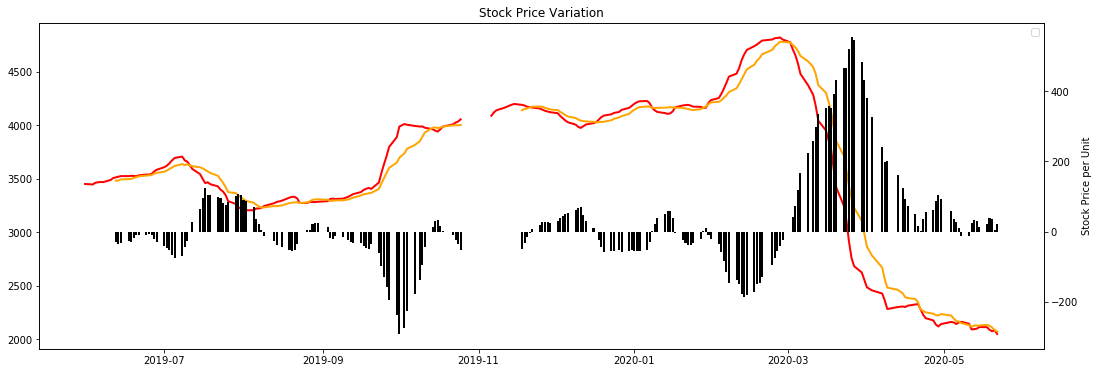

In [12]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18,6))
fig.show()
ax=fig.add_subplot(111)

axr = ax.twinx() 

ax.plot( 'Date', '7_mavg', data=sample_series, marker='', color='red', linewidth=2)
ax.plot( 'Date', '14_mavg', data=sample_series, marker='', color='orange', linewidth=2)
axr.bar( 'Date', 'MACD_7_14', data=sample_series,  color='black', linewidth=2)

plt.title('Stock Price Variation')
plt.xlabel('Date')
plt.ylabel('Stock Price per Unit')
plt.legend(loc=1)
plt.draw()




### Statistical Rolling Windows limit 

In [13]:
sample_series['7_mavg'] = sample_series['Open'].rolling(window=3).mean()
sample_series['7_std'] = sample_series['Open'].rolling(window=3).std()

sample_series['R7_upper_limit'] = sample_series['7_mavg']+ 1*sample_series['7_std'] 
sample_series['R7_lower_limit'] = sample_series['7_mavg']- 1*sample_series['7_std'] 


In [14]:
def anomaly_detection(price,upper_limit,lower_limit):
    if (price > upper_limit or price < lower_limit ):
        return price
    else:
        return None
        
sample_series['Anomaly'] = sample_series.apply(lambda x: anomaly_detection(x['Open'],
                                                          x['R7_upper_limit'],
                                                          x['R7_lower_limit']),axis=1)

/Users/amit/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


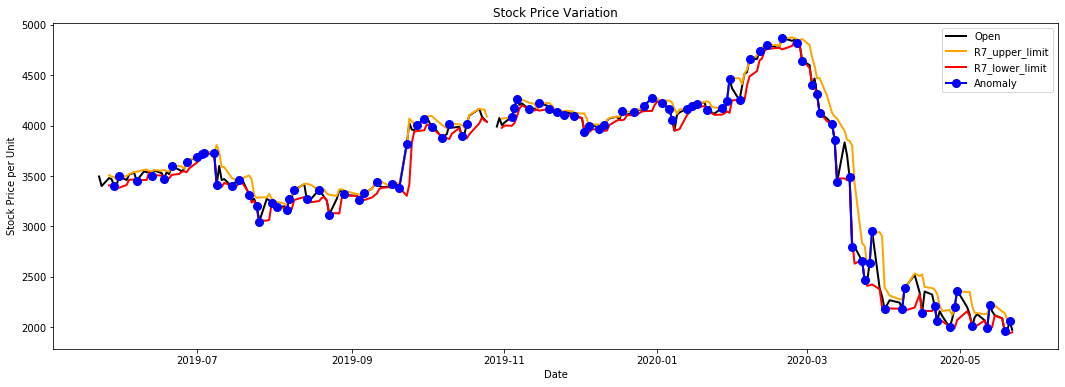

In [15]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18,6))
fig.show()
ax=fig.add_subplot(111)

ax.plot( 'Date', 'Open',           data=sample_series, marker='', color='black', linewidth=2)
ax.plot( 'Date', 'R7_upper_limit', data=sample_series, marker='', color='orange', linewidth=2)
ax.plot( 'Date', 'R7_lower_limit', data=sample_series,  color='red', linewidth=2)
ax.plot( 'Date', 'Anomaly', data=sample_series,  color='blue', linewidth=2, marker='o', markerfacecolor='blue', markersize=8)


plt.title('Stock Price Variation')
plt.xlabel('Date')
plt.ylabel('Stock Price per Unit')
plt.legend(loc=1)
plt.draw()
